<a href="https://colab.research.google.com/github/MUbarak123-56/qiskit-work/blob/master/quantum-protocols-algos/qft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q qiskit

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [2]:
!pip install -q pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [10]:
!pip install -q git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.5 MB/s eta 0:00:00


In [3]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

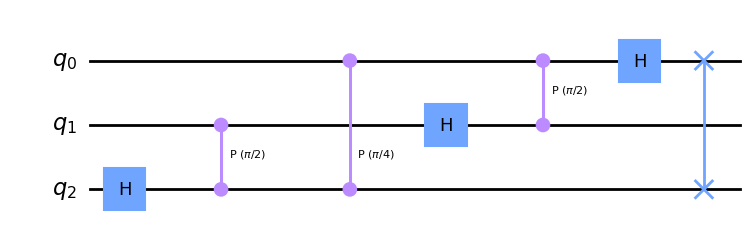

In [5]:
qc = QuantumCircuit(3)
qc.h(2)
qc.cp(pi/2, 1, 2)
qc.cp(pi/4, 0, 2)
qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.swap(0,2)
qc.draw("mpl")

In [8]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
      circuit.cp(pi/2**(n - qubit), qubit, n)

    qft_rotations(circuit, n)

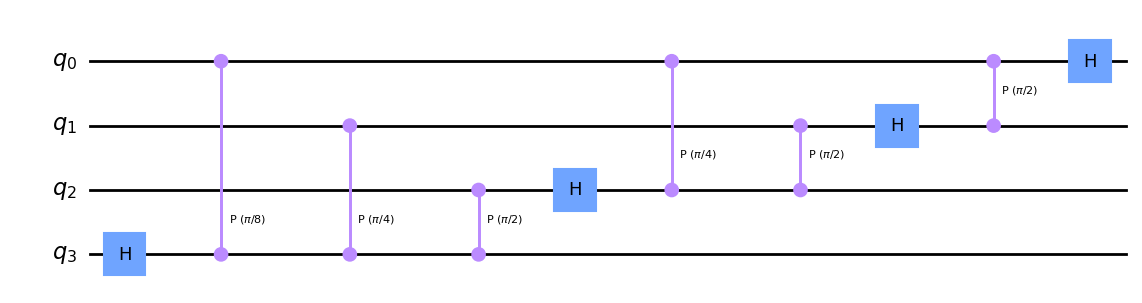

In [9]:
qc = QuantumCircuit(4)
qft_rotations(qc, 4)
qc.draw("mpl")


In [11]:
from qiskit_textbook.widgets import scalable_circuit
scalable_circuit(qft_rotations)

IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\xb2\x00\x00\x01o\x08\x06\x00\x00\x00\x9f\n=o\x00…

In [12]:
def swap_registers(circuit, n):
  for qubit in range(n//2):
    circuit.swap(qubit, n-qubit-1)

  return circuit

In [ ]:
def qft_state(state):
  n = len(state)
  qc = QuantumCircuit(n)
  state = state[::-1]
  for i in range(n):
    if state[i] == "1":
      qc.x(i)
  qc.barrier()
  return qc

In [36]:
def qft(state):
  n = len(state)
  circuit = qft_state(state)
  qft_rotations(circuit, n)
  swap_registers(circuit, n)
  return circuit

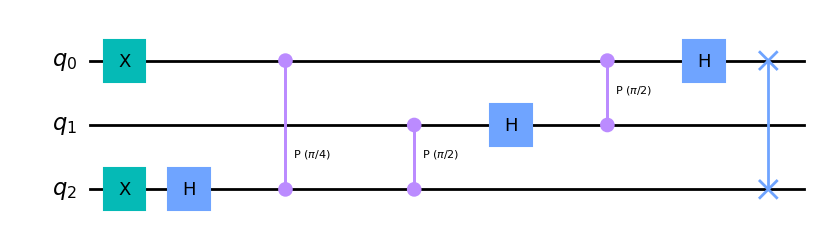

In [37]:
#qc = QuantumCircuit(5)
qc = qft("101")
qc.draw("mpl")

In [23]:
val = str(bin(25))[2:]

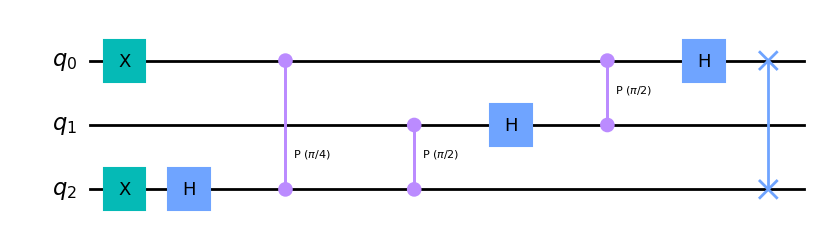

In [41]:
qc = qft("101")
qc.draw("mpl")

In [42]:
from qiskit import execute

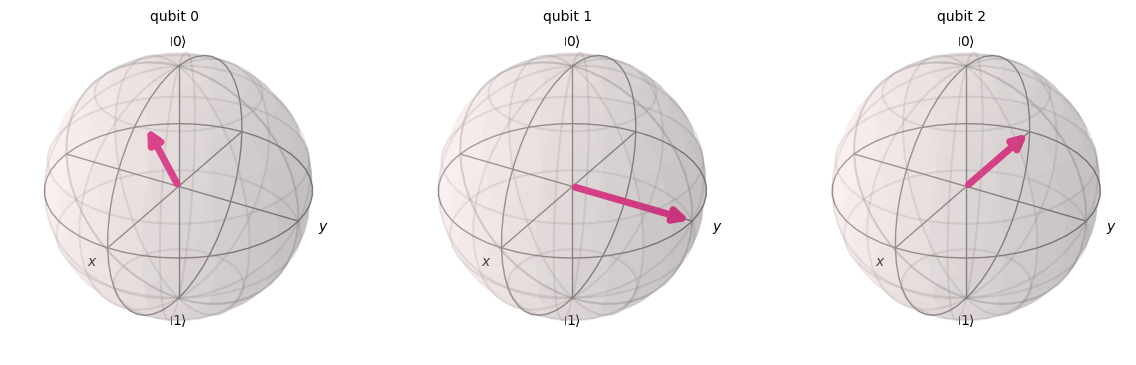

In [43]:
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(statevector)


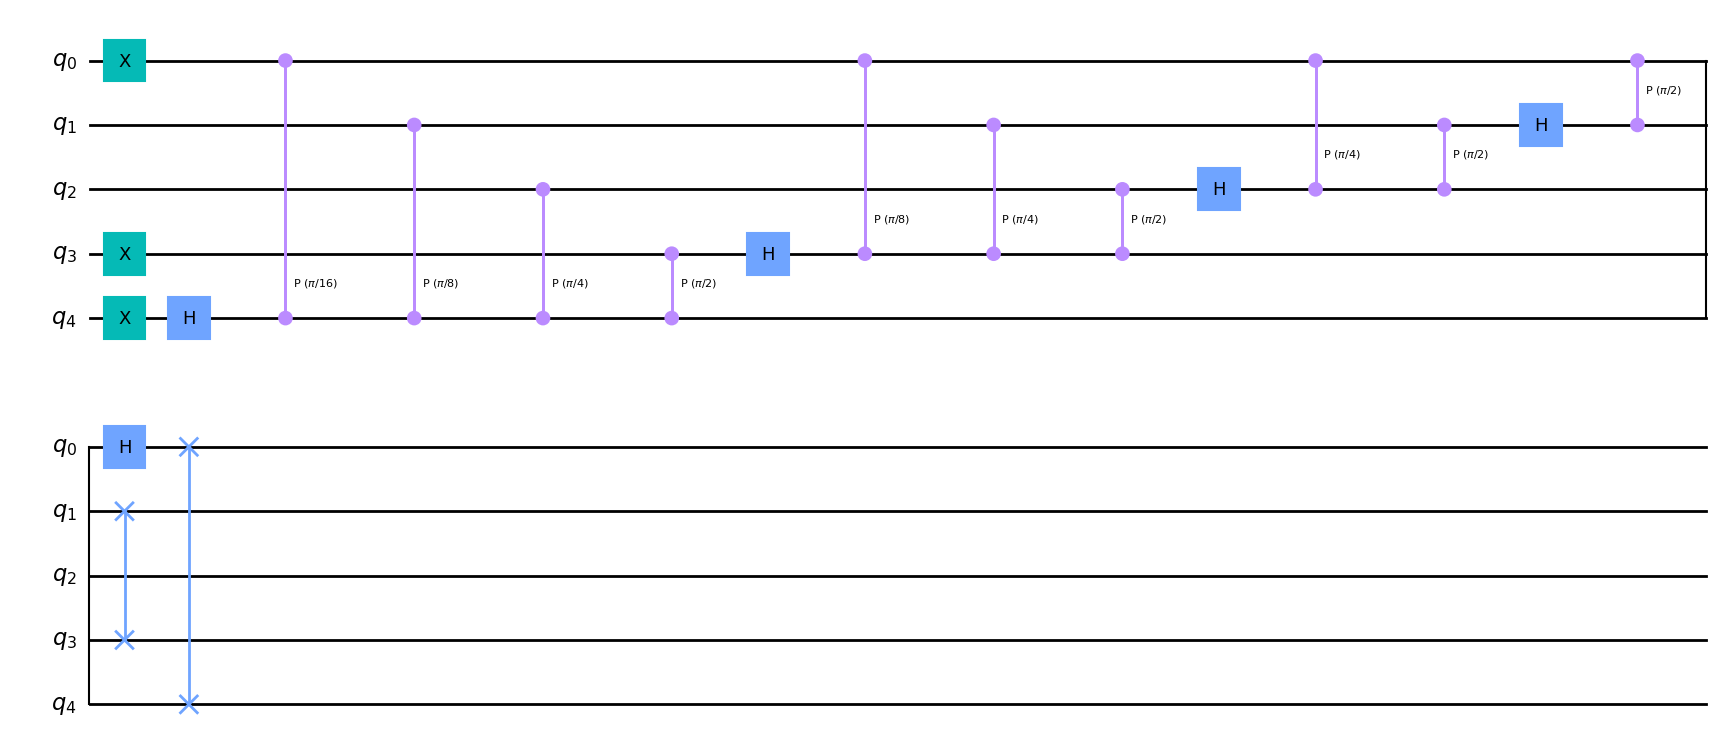

In [44]:
qc2 = qft(val)
qc2.draw("mpl")

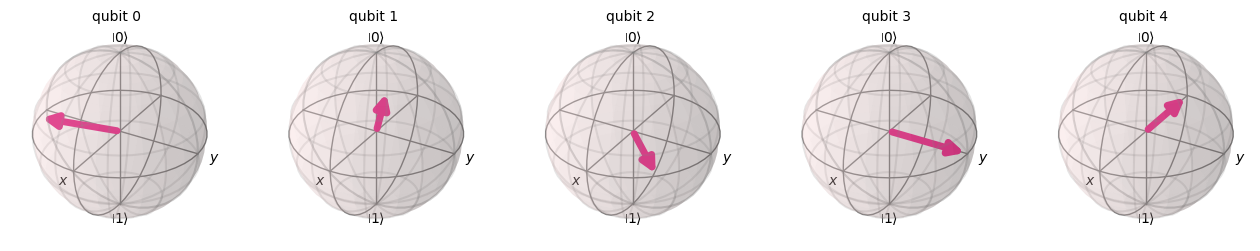

In [45]:
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc2, backend).result().get_statevector()
plot_bloch_multivector(statevector)